
## Dimensionality Reduction and Clustering

The MNIST data set is hand-drawn digits, from zero through nine.Each image is 28 pixels in height and 28 pixels in width, for a total of 784 pixels in total. Each pixel has a single pixel-value associated with it, indicating the lightness or darkness of that pixel, with higher numbers meaning darker. This pixel-value is an integer between 0 and 255, inclusive.

Source: https://www.kaggle.com/c/digit-recognizer/data

For this homework, perform the following with the MNIST data:

Use PCA to reduce the dimensionality

    a. How many components did you use? Why?

    b. Plot the first two components. Do you notice any trends? What is this plot showing us?

    c. Why would you use PCA? What is it doing? And what are the drawbacks?

    d. Plot some of the images, then compress them using PCA and plot again. How does it look?

Use t-SNE to plot the first two components (you should probably random sample around 10000 points):

    a. How does this plot differ from your PCA plot?

    b. How robust is it to changes in perplexity?

    c. How robust is it to different learning rate and number of iterations?

Perform k-means clustering:

    a. How did you choose k?

    b. How did you evaluate your clustering?

    c. Visualize your clusters using t-sne

    d. Did you scale your data?

    e. How robust is your clustering?

Perform hierarchical clustering:

    a. Plot your dendrogram

    b. How many clusters seem reasonable based off your graph?

    c. How does your dendrogram change with different linkage methods?

### Grading
This homework is due March 22, 2018 by midnight Utah time. By that time, you need to have committed all your code to your github and submitted a link to your work to the TA. We can see on your Github account when you last committed code. :)

### Rubric:

- Code Quality - 10%
- Storytelling - 10%
- PCA - 20%
- T-SNE - 20%
- K-means - 20%
- Hierarchical Clustering - 20%

In [113]:
from sklearn.datasets import fetch_mldata

We can use this package to import the MNIST data set of handwritten digits.  We will also scale our data.

In [114]:
mnist = fetch_mldata("MNIST original")
X = mnist.data / 255.0
y = mnist.target

Great!  Let's bring in a few more packages and we'll be ready to tackle PCA.

In [115]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline
from sklearn.utils import shuffle
from sklearn.decomposition import PCA

## PCA

We can start by looking at just two components with PCA.

In [116]:
pca = PCA(n_components=2)
X_2dim = pca.fit_transform(X)

And we can see that this does indeed reduce our dimensionality to only two components.

In [117]:
X_2dim.shape

(70000, 2)

What percent of variance in our data is explained by only two components?

In [118]:
pca.explained_variance_ratio_

array([ 0.09746116,  0.07155445])

Between the two components, we are explaining about 17% of the data.  That leaves a bit to be desired.  This is a pretty intuitive result as two variables can hardly be expected to explain much of the data alone.  We can graph the explained variance ratio across varying dimensions to inform our choice of an optimal number of components.

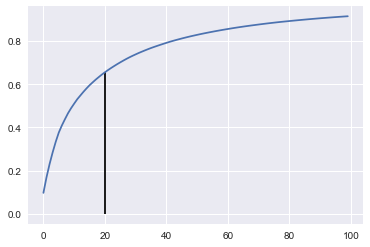

In [119]:
pca = PCA(n_components=100)
X_pca = pca.fit_transform(X)
cum_ratio = np.cumsum(pca.explained_variance_ratio_)
plt.plot(range(len(cum_ratio)), cum_ratio)
plt.vlines(ymin=0,ymax=cum_ratio[20],x=20)

Based on this chart, we know that the rate at which the variance explained ratio is increasing begins to slow down after 20 components.  For this reason I will elect to use 20 components.

In [120]:
pca = PCA(n_components=20)
X_pca = pca.fit_transform(X)
print(X_pca.shape)

(70000, 20)


We can plot the two principal components against each other to see if we observe any clear trends.

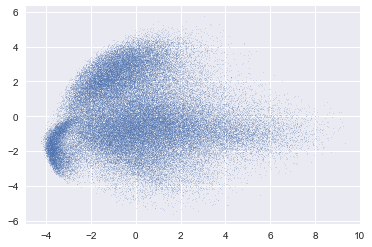

In [121]:
plt.scatter(X_pca[:,0],X_pca[:,1],s=.1,alpha=.55)

As we can see from the plot, there isn't a clear relationship between the two components.  This isn't too surprising since a strong relationship between our components would imply redundancy in our features.

At this juncture, one might hypothetically ask-- 'Why are we using PCA? What is it doing? And what are its drawbacks?'  Essentially we use PCA to reduce the dimensionality of our data.  This helps us to avoid overfitting.  Because it reduces the number of features that we use, it will also speed up our algorithm.  One drawback of PCA is that it actually reduces the interpretability of our data.  This is because PCA creates components that are linear combinations of our initial features, which are harder to clearly interpret.

We can now try our hand at plotting some of the hand-drawn digits and compare them to plotted digits using PCA compression.

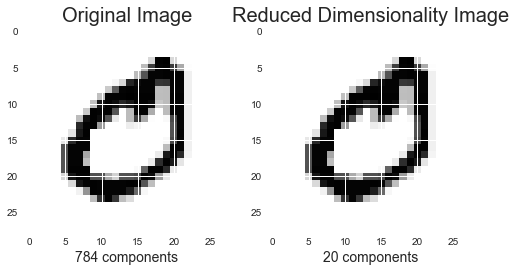

In [122]:
plt.figure(figsize=(8,4));

# Original Image
plt.subplot(1, 2, 1);
plt.imshow(mnist.data[1].reshape(28,28),
              cmap ='Greys', interpolation='nearest',
              clim=(0, 255));
plt.xlabel('784 components', fontsize = 14)
plt.title('Original Image', fontsize = 20);

# 20 principal components
plt.subplot(1, 2, 2);
plt.imshow(X[1].reshape((28,28)), cmap='Greys');
plt.xlabel('20 components', fontsize = 14)
plt.title('Reduced Dimensionality Image', fontsize = 20);

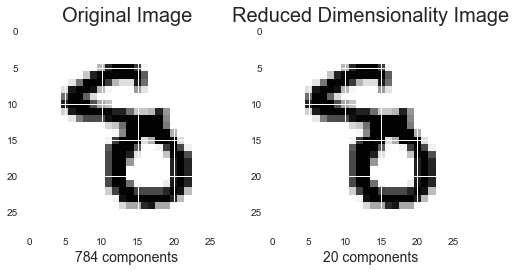

In [123]:
plt.figure(figsize=(8,4));

# Original Image
plt.subplot(1, 2, 1);
plt.imshow(mnist.data[50000].reshape(28,28),
              cmap ='Greys', interpolation='nearest',
              clim=(0, 255));
plt.xlabel('784 components', fontsize = 14)
plt.title('Original Image', fontsize = 20);

# 20 principal components
plt.subplot(1, 2, 2);
plt.imshow(X[50000].reshape((28,28)), cmap='Greys');
plt.xlabel('20 components', fontsize = 14)
plt.title('Reduced Dimensionality Image', fontsize = 20);

## T-SNE

We can now use TSNE (t-distributed stochastic neighbor embedding if you wish to be pretentious) to plot the first two components of our data.

In [125]:
from sklearn.manifold import TSNE

#We will first reduce dimensionality before feeding to t-sne
pca = PCA(n_components=20)
X_pca = pca.fit_transform(X)

rows = np.arange(70000)
np.random.shuffle(rows)
n_select = 10000

tsne = TSNE(n_components=2, verbose=1, perplexity=50, n_iter=1000, learning_rate=200)
tsne_results = tsne.fit_transform(X_pca[rows[:n_select],:])

[t-SNE] Computing pairwise distances...
[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 1.503714
[t-SNE] KL divergence after 50 iterations with early exaggeration: 1.208776
[t-SNE] Error after 275 iterations: 1.208776


In [126]:
tsne = pd.DataFrame(tsne_results, columns=['comp1', 'comp2'])
tsne['label'] = y[rows[:n_select]]

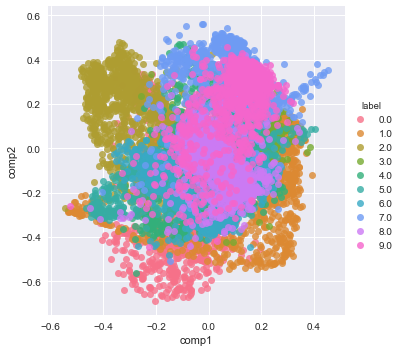

In [127]:
sns.lmplot(x='comp1', y='comp2', data=tsne, hue='label', fit_reg=False)

What a plot.  Unlike our PCA plot which showed the relationship between the two components, our TSNE figure shows how the two components have grouped our data points and color-codes them to correspond to the digit they represent.  We can tell from this plot that two components do a pretty good job of distinctly grouping twos, but not so well at distinguishing eights and nines.  We can also play with perplexity, learning rate, and number of iterations to see how these hyperparameters affect our plot.

#### First perplexity: 
Remember that our initial perplexity was 50.  We can try both a smaller and a larger perplexity than 50 to see how robust TSNE is to changes in perplexity.

In [128]:
tsne = TSNE(n_components=2, verbose=1, perplexity=10, n_iter=1000, learning_rate=200)
tsne_results = tsne.fit_transform(X_pca[rows[:n_select],:])

[t-SNE] Computing pairwise distances...
[t-SNE] Computing 31 nearest neighbors...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 1.019862
[t-SNE] KL divergence after 50 iterations with early exaggeration: 2.310614
[t-SNE] Error after 250 iterations: 2.310614


In [129]:
tsne = pd.DataFrame(tsne_results, columns=['comp1', 'comp2'])
tsne['label'] = y[rows[:n_select]]

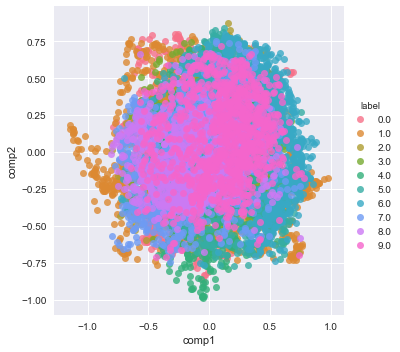

In [130]:
sns.lmplot(x='comp1', y='comp2', data=tsne, hue='label', fit_reg=False)

It looks like the perplexity really matters.  Everything in this plot is pretty much grouped in one big clump.  Let's try a larger perplexity.

In [131]:
tsne = TSNE(n_components=2, verbose=1, perplexity=150, n_iter=1000, learning_rate=200)
tsne_results = tsne.fit_transform(X_pca[rows[:n_select],:])

[t-SNE] Computing pairwise distances...
[t-SNE] Computing 451 nearest neighbors...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 1.921571
[t-SNE] KL divergence after 50 iterations with early exaggeration: 0.654227
[t-SNE] Error after 200 iterations: 0.654227


In [132]:
tsne = pd.DataFrame(tsne_results, columns=['comp1', 'comp2'])
tsne['label'] = y[rows[:n_select]]

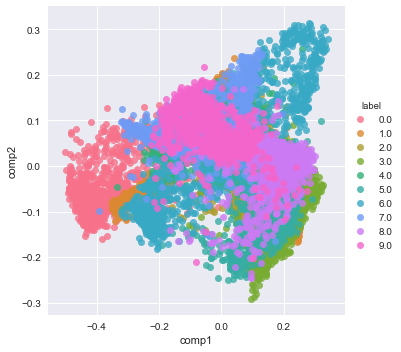

In [133]:
sns.lmplot(x='comp1', y='comp2', data=tsne, hue='label', fit_reg=False)

Clearly TSNE plots change size and shape quite a bit depending on the perplexity.  We can conclude that TSNE is not very robust to changes in this hyper-parameter.

#### Now let's toy with the learning rate:
First smaller--

[t-SNE] Computing pairwise distances...
[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 1.503714
[t-SNE] KL divergence after 50 iterations with early exaggeration: 1.208828
[t-SNE] Error after 75 iterations: 1.208828


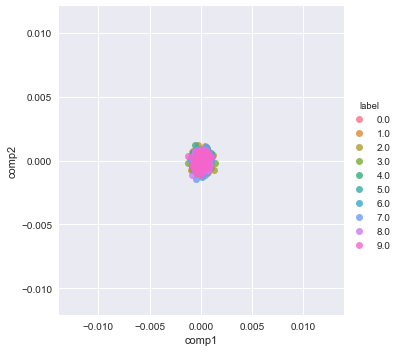

In [134]:
tsne = TSNE(n_components=2, verbose=1, perplexity=50, n_iter=1000, learning_rate=50)
tsne_results = tsne.fit_transform(X_pca[rows[:n_select],:])
tsne = pd.DataFrame(tsne_results, columns=['comp1', 'comp2'])
tsne['label'] = y[rows[:n_select]]
sns.lmplot(x='comp1', y='comp2', data=tsne, hue='label', fit_reg=False)

Woah.  Now let's see bigger--

[t-SNE] Computing pairwise distances...
[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 1.503714
[t-SNE] KL divergence after 100 iterations with early exaggeration: 1.190843
[t-SNE] Error after 325 iterations: 1.190843


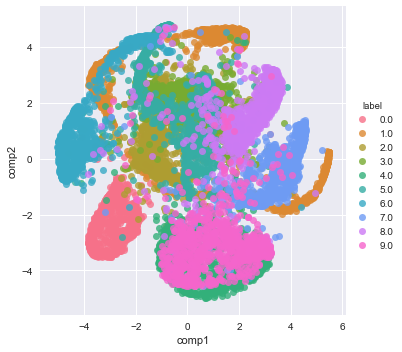

In [135]:
tsne = TSNE(n_components=2, verbose=1, perplexity=50, n_iter=1000, learning_rate=500)
tsne_results = tsne.fit_transform(X_pca[rows[:n_select],:])
tsne = pd.DataFrame(tsne_results, columns=['comp1', 'comp2'])
tsne['label'] = y[rows[:n_select]]
sns.lmplot(x='comp1', y='comp2', data=tsne, hue='label', fit_reg=False)

TSNE is not robust to changes in learning rate either.

#### Finally let's change iterations:

Again I will revert back to our original settings (perplexity of 50, learning rate of 200) for purposes of comparison.  First larger--

[t-SNE] Computing pairwise distances...
[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 1.503714
[t-SNE] KL divergence after 50 iterations with early exaggeration: 1.208763
[t-SNE] Error after 200 iterations: 1.208763


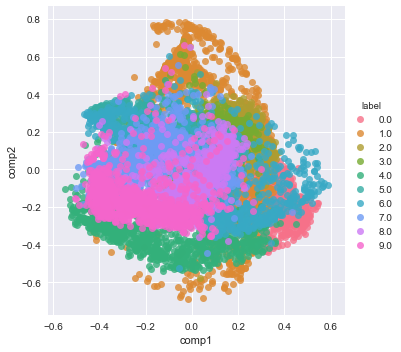

In [136]:
tsne = TSNE(n_components=2, verbose=1, perplexity=50, n_iter=5000, learning_rate=200)
tsne_results = tsne.fit_transform(X_pca[rows[:n_select],:])
tsne = pd.DataFrame(tsne_results, columns=['comp1', 'comp2'])
tsne['label'] = y[rows[:n_select]]
sns.lmplot(x='comp1', y='comp2', data=tsne, hue='label', fit_reg=False)

Now smaller--

[t-SNE] Computing pairwise distances...
[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 1.503714
[t-SNE] KL divergence after 50 iterations with early exaggeration: 1.208766
[t-SNE] Error after 200 iterations: 1.208766


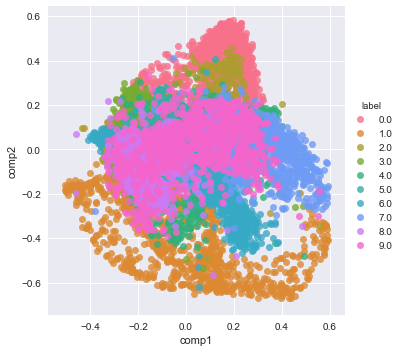

In [137]:
tsne = TSNE(n_components=2, verbose=1, perplexity=50, n_iter=200, learning_rate=200)
tsne_results = tsne.fit_transform(X_pca[rows[:n_select],:])
tsne = pd.DataFrame(tsne_results, columns=['comp1', 'comp2'])
tsne['label'] = y[rows[:n_select]]
sns.lmplot(x='comp1', y='comp2', data=tsne, hue='label', fit_reg=False)

TSNE seems to be more robust to changes in the number of iterations than to our other hyper-parameters.  Still there is quite a difference here between the plots, so overall we can conclude that TSNE is not robust to changes in hyper-parameters.

## K-Means

Let's now transition to unsupervised learning.  We can use K-Means to cluster without use of labels.

Because we have 10 classes in our data (one for each digit), we will choose 10 for our k.

In [142]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=10, n_init=25, n_jobs=1)
kmeans.fit(X[:n_select,:])

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=10, n_init=25, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

Although it is more tricky to evaluate clustering in unsupervised learning, we can still try our hand at it using the silhouette score. This gives the mean distance between a sample and all other points in the next nearest cluster subtracted by the mean distance between a sample and all other points in the same class.

In [147]:
from sklearn.metrics.cluster import silhouette_score
silhouette_score(X[rows[:n_select],:], kmeans.labels_, metric='euclidean')

-0.0046063299826940365

Silhouette scores fall between -1 and 1 and higher scores are better than lower scores.  This score is not super good since it is slightly negative, but maybe not dreadful since it is very close to 0.  Let's visualize our clusters using TSNE.

In [151]:
tsne = TSNE(n_components=2, verbose=1, perplexity=50, n_iter=1000, learning_rate=200)
tsne_results = tsne.fit_transform(X_pca[rows[:n_select],:])
tsne = pd.DataFrame(tsne_results, columns=['comp1', 'comp2'])
tsne['label'] = y[rows[:n_select]]

[t-SNE] Computing pairwise distances...
[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 1.503714
[t-SNE] KL divergence after 50 iterations with early exaggeration: 1.208780
[t-SNE] Error after 225 iterations: 1.208780


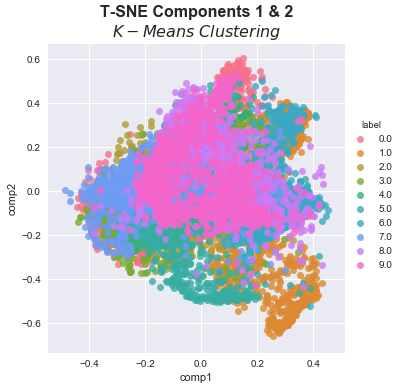

In [153]:
sns.lmplot(x='comp1', y='comp2',hue='label', data=tsne, fit_reg=False)
plt.title('T-SNE Components 1 & 2\n$\it{K-Means}$ $\it{Clustering}$', fontsize=16, fontweight='bold')

Note that I scaled my data upon import by dividing by 255.  I was able to normalize in this way because MNIST does not deal with defined distances that would cause us to worry about distorting the distance between points.  Concerning robustness of these clusters, ideally we would perform clustering on many small samples of our data to test this.  Clustering can change a ton as the data changes because what distinguishes groups in one segment of the data (say a sample containing only zeros and ones) may not be what best distinguishes a more diverse segment.

## Hierarchical Clustering

Let's try one more type of clustering.  This hierarchical method uses a bottom-up approach to combine the data into the major clusters.  We can first plot a dendogram to see how this works for our set.

In [154]:
from scipy.cluster.hierarchy import dendrogram, linkage

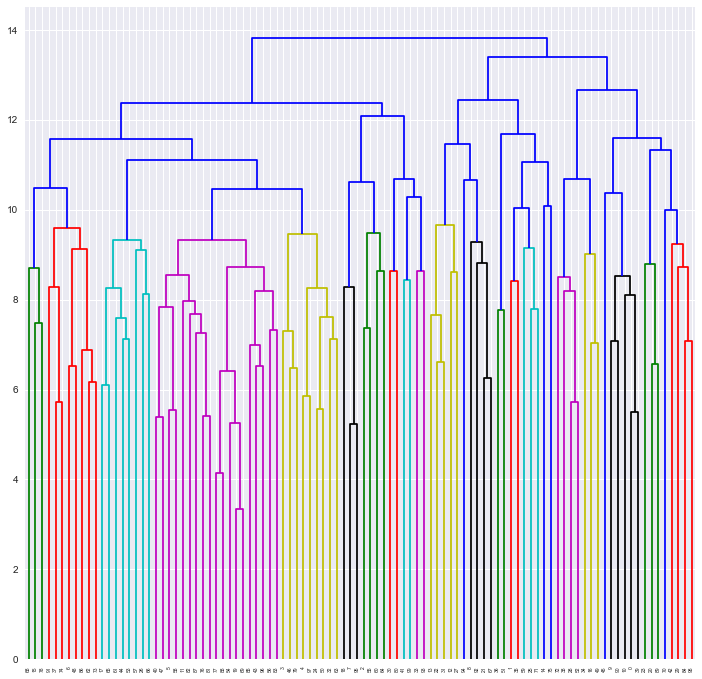

In [155]:
x_shuffle = shuffle(X, random_state=42)
Z = linkage(x_shuffle[:100], 'complete')
plt.figure(figsize=(12, 12))
_ = dendrogram(Z)

Based on this graph, it seems that it would be reasonable to group the data into about 8 clusters.  This makes a lot of sense since we know the mnist set contains 10 different digits (comparable number of groupings).  Let's try another linkage method.

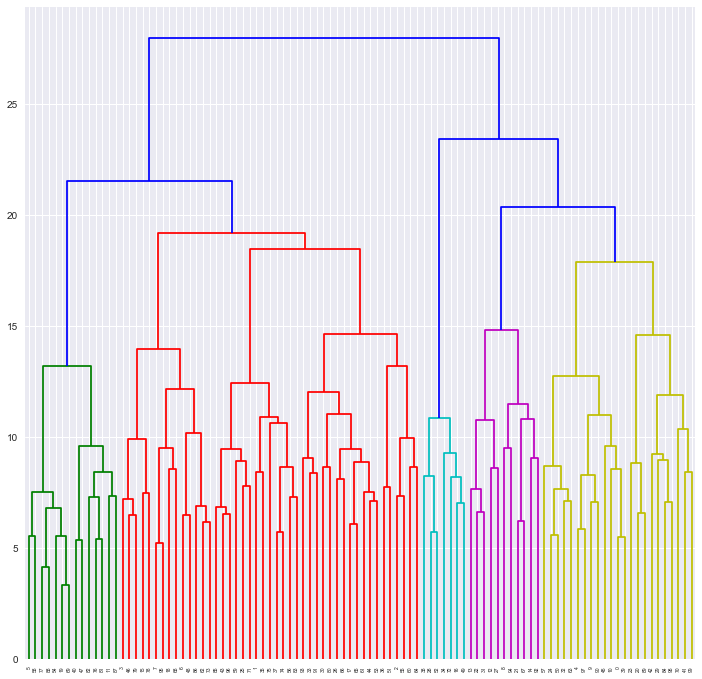

In [156]:
x_shuffle = shuffle(X, random_state=42)
Z = linkage(x_shuffle[:100], 'ward')
plt.figure(figsize=(12, 12))
_ = dendrogram(Z)

This seems better!  Let's try another method.

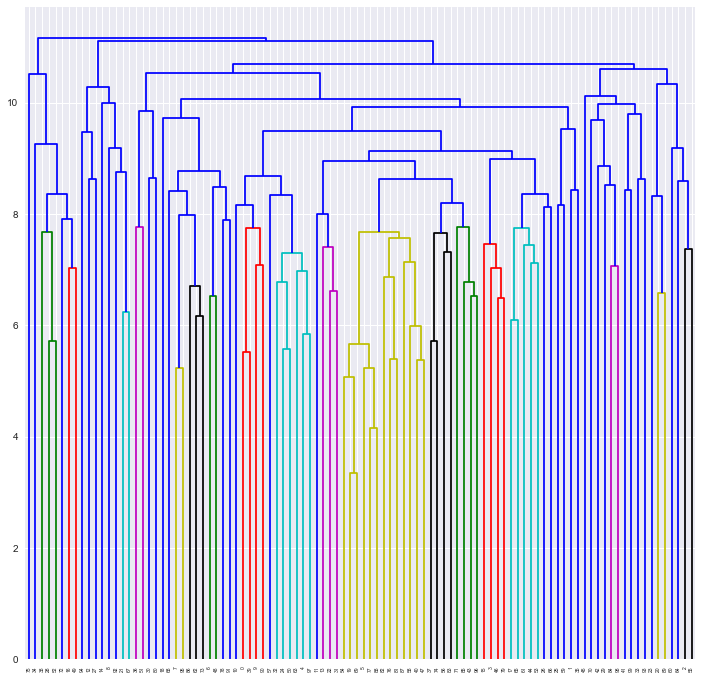

In [157]:
x_shuffle = shuffle(X, random_state=42)
Z = linkage(x_shuffle[:100], 'average')
plt.figure(figsize=(12, 12))
_ = dendrogram(Z)

And this is a mess! Ward seems to be the best out of these linkage methods.